# A Comparison of Nonstandard Finite-Difference Method with Standard Runge-Kutta Methods for Epidemic Compartmental Models

In this Work, we are about to compare the stability and approximation accuracy of two numerical methods which are the STANDARD FINITE DIFFRENCE and the NON STANDARD FINITE DIFFRENCE. To do that, we will study the Ebola virus in order to plot the numerical solutions given by the differential equations, since this spread of the virus gives us a non linear system which is almost impossible to solve and obtain the exact solution. We will plot the solutions given by the SFD and the NSFD and also the exact solution in order to compare and conclude.

In [1]:
# In this part, we are importing the different librairies we will use.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

The differential equation coming from the spread of the virus is given by :

\begin{align}
\begin{cases}
\frac{dS}{dt} = \pi - (\beta_1 I + \beta_2 D + \lambda P)S - \mu S
\\\\\frac{dI}{dt} = (\beta_1 I + \beta_2 D + \lambda P)S - (\mu + \delta + \gamma)I
\\\\\frac{dR}{dt} = \gamma I - \mu R
\\\\\frac{dR}{dt} = (\mu + \delta) I - bD
\\\\\frac{dP}{dt} = \sigma + \xi I + \alpha D - \eta P
\end{cases}
\end{align}

In [2]:
# In this part we want to compute the exact solution

def Ebolafunction(t,y):
    
    S = y[0]
    I = y[1]
    R = y[2]
    D = y[3]
    P = y[4]
    
    mu, delta, gamma, pi, b, xi, alpha, eta, lamda, beta1, beta2, sigma = parameters
    
    dS_dt = pi - (beta1*I + beta2*D + lamda*P)*S - mu*S
    dI_dt = (beta1*I + beta2*D + lamda*P)*S - (mu + delta + gamma)*I
    dR_dt = gamma*I - mu*R
    dD_dt = (mu + delta)*I - b*D
    dP_dt = sigma + xi*I + alpha*D - eta*P
    
    return np.stack((dS_dt,dI_dt,dR_dt,dD_dt,dP_dt))

#         mu, delta, gamma, pi, b, xi, alpha, eta, lamda, beta1, beta2, sigma
parameters = [0.02,0.9,0.06,10,0.8,0.0,0.0,0.03,0.01,0.006,0.012,0.6]

# S0, I0, R0, D0, P0 are intial conditions
y0 = [13.,20.,0.,20.,0.]

#We define the stepsize
T  = 600.
N = 20000
tt = np.linspace(0, T, N+1)
t0 = [0,T]

# This following code will give us the different solutions of the ODEs using Runge-Kutta method
sol = solve_ivp(Ebolafunction, t0, y0, method='RK45', t_eval=tt)

In this part, we are using the explicit Runge-Kutta Method which is given for this specific problem by, for $X = (S,I,R,D,P)$ the exact solution :

$X_{n+1} = X_n + hf(X_n,t_n)$

With $X_n = (S_n,I_n,R_n,D_n,P_n)$, $h$ is the step size and $f(X_n,t_n) = (\pi - (\beta_1 I_n + \beta_2 D_n + \lambda P_n)S_n - \mu S_n,(\beta_1 I_n + \beta_2 D_n + \lambda P_n)S_n - (\mu + \delta + \gamma)I_n,\gamma I_n - \mu R_n,(\mu + \delta) I_n - bD_n,\sigma + \xi I_n + \alpha D_n - \eta P_n)$

In [3]:
# In this part we want to compute the solution given by the explicit Euler Method

def Eulerfunction(y,t):
    
    S, I, R, D, P = y
    
    mu, delta, gamma, pi, b, xi, alpha, eta, lamda, beta1, beta2, sigma = parameters
    
    dS = pi - (beta1*I + beta2*D + lamda*P)*S - mu*S
    dI = (beta1*I + beta2*D + lamda*P)*S - (mu + delta + gamma)*I
    dR = gamma*I - mu*R
    dD = (mu + delta)*I - b*D
    dP = sigma + xi*I + alpha*D - eta*P
    
    return np.array([dS,dI,dR,dD,dP])

mu, delta, gamma, pi, b, xi, alpha, eta, lamda, beta1, beta2, sigma = parameters

# S0, I0, R0, D0, P0 are initial conditions
y0 = [13.,20.,0.,20.,0.]

#We define the stepsize
T  = 600.
Nt = 1000
d = int(N/Nt)
t = np.linspace(0, T, Nt+1)
h = t[1] - t[0]
t0 = [0,T]

X = np.zeros((Nt+1,5))
X[0] = y0
for k in range(Nt):
    X[k+1] = X[k] + h*Eulerfunction(X[k],0.)
print(X[-1])

[24.25779129  9.70902467 29.12690722 11.16537837 19.99999974]


In this section, we are using the explicit NON STANDARD FINITE DIFFERENCE Method which is given for this specific problem by :

$S_{n+1} = \dfrac{\phi \pi + S_n}{1+\phi(\mu + B_n)}$

$I_{n+1} = \dfrac{(1+\phi(\mu + B_n))I_n + \phi B_n (\phi \pi + S_n)}{(1+\phi(\mu + B_n))(1+\phi(\mu + B_n))}$

$R_{n+1} = \dfrac{(1+\phi(\mu + \delta + \gamma))(1+\phi(\mu + B_n))R_n + \gamma \phi ((1+\phi(\mu + B_n))I_n +\phi (\pi \phi + S_n)B_n)}{(1+\mu \phi)(1+\phi(\mu + \delta + \gamma))(1+\phi(\mu + B_n))}$

$D_{n+1} = \dfrac{(1+\phi(\mu + \delta + \gamma))(1+\phi(\mu + B_n))D_n + (\mu + \delta)\phi((1+\phi(\mu + B_n)I_n + \phi(\pi \phi + S_n)B_n)}{(1+b \phi)(1+\phi(\mu + \delta + \gamma))(1+\phi(\mu + B_n))}$

$P_{n+1} = \dfrac{\phi(\sigma + \xi I_n + \alpha D_n) + P_n}{1+\eta \phi}$

With $B_n = \beta_1 I_n + \beta_2 D_n + \lambda P_n$ and $\phi(h) = \phi = \dfrac{1 - e^{-(\mu + \delta + \gamma)h}}{\mu + \delta + \gamma}$

In [4]:
# In this part we want to compute the solution given by the NON STANDARD FINITE DIFFERENCE

#We define the function phi that we will use for computation
pars = mu + delta + gamma
phi = (1-np.exp(-pars*h))/pars

#We define the vectors which contain the different values of the solutions at the meshgrid points.
S = np.zeros(Nt+1)
I = np.zeros(Nt+1)
R = np.zeros(Nt+1)
D = np.zeros(Nt+1)
P = np.zeros(Nt+1)

# Initial conditions
S[0] = 13.
I[0] = 20.
R[0] = 0.
D[0] = 20.
P[0] = 0.

A0 = b*lamda*pi*sigma
A1 = eta*pi*(b*beta1+beta2*(mu+delta)) + lamda*pi*(b*xi+alpha*delta + alpha*mu) - \
     b*eta*mu*(mu + delta + gamma) - b*lamda*sigma*(mu + delta + gamma)
A2 = (mu + delta + gamma)*(eta*(b*beta1 + beta2*(mu+delta)) + lamda*(b*xi+alpha*delta + alpha*mu))

for i in range(Nt):
    
    #We define also the commun factors within the expressions of the solutions
    Bn = beta1*I[i] + beta2*D[i] + lamda*P[i]
    Deno = (1+phi*pars)*(1+phi*(mu+Bn))
    Fac1 = 1 + phi*(mu + Bn)
    Fac2 = phi*(pi*phi + S[i])
    Fac3 = (1 + phi*pars)
    
    S[i+1] = (pi*phi + S[i])/Fac1
    I[i+1] = (Fac1*I[i] + Fac2*Bn)/Deno
    R[i+1] = (Fac3*Fac1*R[i] + gamma*phi*(Fac1*I[i] + Fac2*Bn))/((1+mu*phi)*Deno)
    D[i+1] = (Fac3*Fac1*D[i] + (mu+delta)*phi*(Fac1*I[i] + Fac2*Bn))/((1+b*phi)*Deno)
    P[i+1] = (phi*(sigma + xi*I[i] + alpha*D[i]) + P[i])/(1+eta*phi)

In [6]:
R0 = (eta*pi*(b*beta1 + beta2*(mu+delta)) + lamda*pi*(b*xi + alpha*delta + alpha*mu))/(b*eta*mu*(mu + delta + gamma))
print("R0 = ",R0)

R0 =  10.10204081632653


In [7]:
SEE = (2*pi*A2 - (mu + delta + gamma)*(A1 + np.sqrt(A1**2 + 4*A2*A0)))/(2*mu*A2)
IEE = (A1 + np.sqrt(A1**2 + 4*A2*A0))/(2*A2)
REE = (gamma*(A1 + np.sqrt(A1**2 + 4*A2*A0)))/(2*mu*A2)
DEE = ((mu + delta)*(A1 + np.sqrt(A1**2 + 4*A2*A0)))/(2*b*A2)
PEE = (2*b*sigma*A2 + (b*xi + alpha*delta + alpha*mu)*(A1 + np.sqrt(A1**2 + 4*A2*A0)))/(2*b*eta*A2)

print("Endemic equilibrium for sigma = ",sigma," different from 0 is :", [SEE,IEE,REE,DEE,PEE])

Endemic equilibrium for sigma =  0.6  different from 0 is : [24.25779112775007, 9.709024670862243, 29.127074012586725, 11.16537837149158, 19.999999999999996]


In [8]:
mu, delta, gamma, pi, b, xi, alpha, eta, lamda, beta1, beta2, sigma = parameters
Hm = pi/mu
Dm = ((mu+delta)*pi)/(b*mu)
Pm = ((sigma*mu + xi*pi)*b + (delta + mu)*alpha*pi)/(b*eta*mu)
print("Hm = ",Hm,"Dm = ",Dm,"Pm = ",Pm)
print("A0 = ",A0,"A1 = ",A1, "A2 = ", A2)

Hm =  500.0 Dm =  575.0 Pm =  20.0
A0 =  0.048 A1 =  -0.00042239999999999986 A2 =  0.000465696


In this section, we will plot three Solutions. The exact solution, the solution given by the SFD and the solution given by the NSFD and we will see which of the two numerical methods gives the solutions close to the exact solution. And after that we will compute the error for each method.

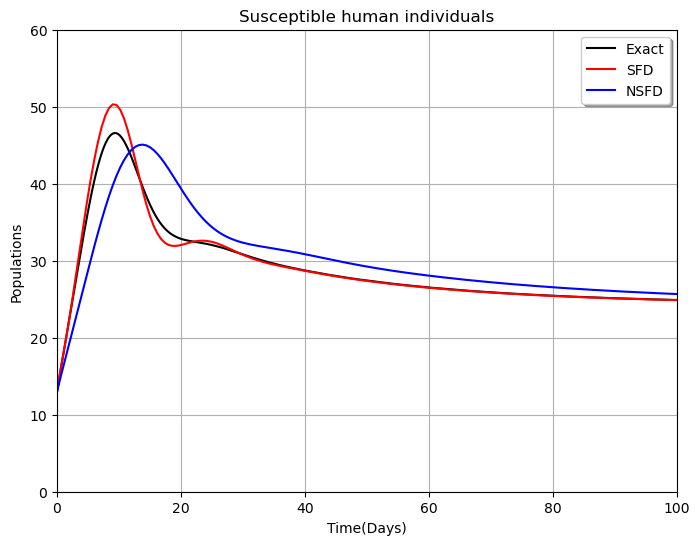

In [9]:
# In this cell, we plot two solutions for S, one for the SFD and another one the NSFD 

plt.figure(figsize = (8, 6))
plt.plot(sol.t, sol.y[0], label='S', color='k')
plt.plot(t, X[:,0], label='S+', color='r')
plt.plot(t, S, label='S', color='b')
plt.legend(['Exact','SFD','NSFD'], shadow=True)
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.title('Susceptible human individuals')
plt.xlim([0,100])
plt.ylim([0,60])
plt.grid(True)
plt.show()

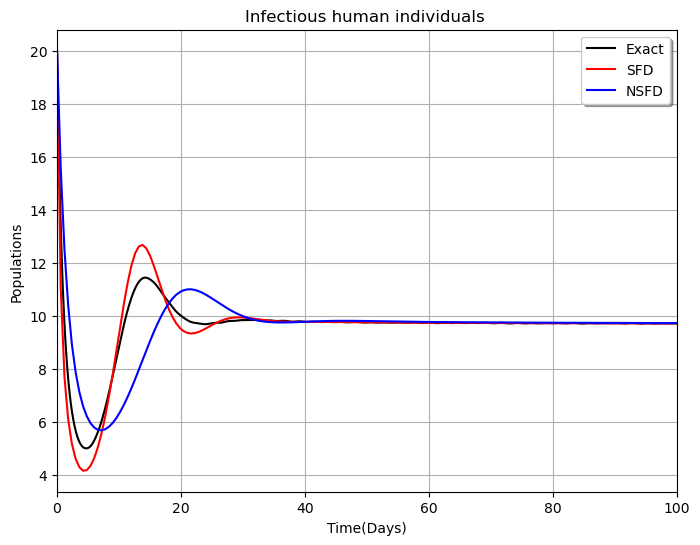

In [12]:
# In this cell, we plot two solutions for I, one for the SFD and another one the NSFD 

plt.figure(figsize = (8, 6))
plt.plot(sol.t, sol.y[1], label='I', color='k')
plt.plot(t, X[:,1], label='S+', color='r')
plt.plot(t, I, label='I', color='b')
plt.legend(['Exact','SFD','NSFD'], shadow=True)
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.xlim([0,100])
plt.title('Infectious human individuals ')
plt.grid(True)
plt.show()

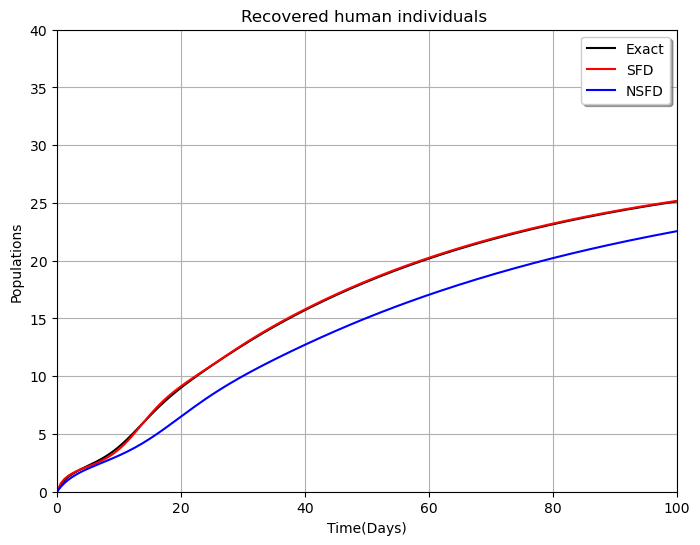

In [13]:
# In this cell, we plot two solutions for R, one for the SFD and another one the NSFD 

plt.figure(figsize = (8, 6))
plt.plot(sol.t, sol.y[2], label='R', color='k')
plt.plot(t, X[:,2], label='S+', color='r')
plt.plot(t, R, label='R', color='b')
plt.legend(['Exact','SFD','NSFD'], shadow=True)
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.xlim([0,100])
plt.ylim([0,40])
plt.title('Recovered human individuals ')
plt.grid(True)
plt.show()

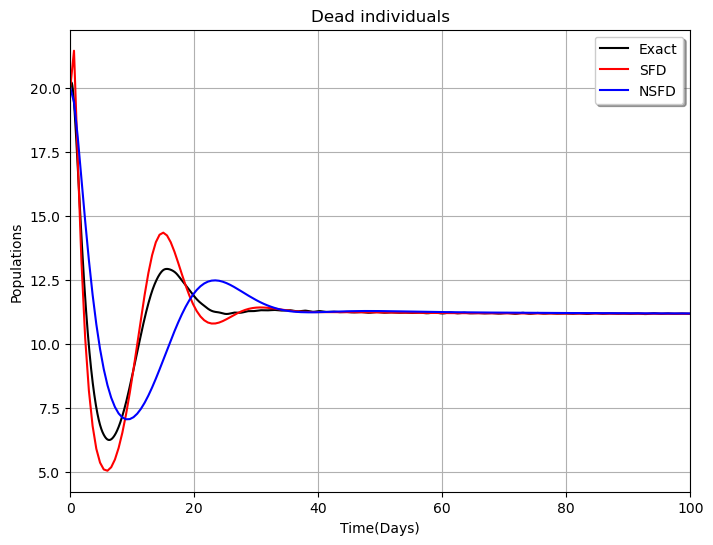

In [14]:
# In this cell, we plot two solutions for D, one for the SFD and another one the NSFD 

plt.figure(figsize = (8, 6))
plt.plot(sol.t, sol.y[3], label='D', color='k')
plt.plot(t, X[:,3], label='S+', color='r')
plt.plot(t, D, label='D', color='b')
plt.legend(['Exact','SFD','NSFD'], shadow=True)
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.xlim([0,100])
#plt.ylim([-5,6])
plt.title('Dead individuals')
plt.grid(True)
plt.show()

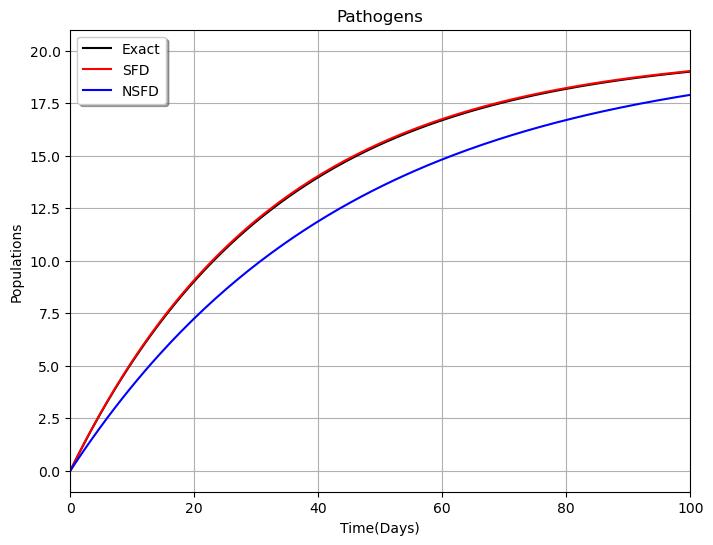

In [15]:
# In this cell, we plot two curves for the last solution P, one for the SFD and another one the NSFD 

plt.figure(figsize = (8, 6))
plt.plot(sol.t, sol.y[4], label='P', color='k')
plt.plot(t, X[:,4], label='S+', color='r')
plt.plot(t, P, label='P', color='b')
plt.legend(['Exact','SFD','NSFD'], shadow=True)
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.xlim([0,100])
#plt.ylim([0,5])
plt.title('Pathogens')
plt.grid(True)
plt.show()

The Global Error for the Standard Finite Difference (GEsfd) is given by the formula :

$E_n = Y(t_n)-X_{n}$

where $Y(t_n) = (S(t_n),I(t_n),R(t_n),D(t_n),P(t_n))$ is the exact solution and $X_n = (S_n,I_n,R_n,D_n,P_n)$ is the solution given by Euler Method.

In [16]:
GEsfd = np.zeros((Nt,5))
GE = np.zeros(5)

for i in range(5):
    for j in range(Nt):
        GEsfd[j,i] = abs(sol.y[i,d*(j+1)] - X[j,i])
        GE[i] = GE[i] + (sol.y[i,d*(j+1)] - X[j,i])**2
    GE[i] = (GE[i])**(1/2)
    
GE

array([13.32381451,  8.04373845,  2.09692411,  7.73638436,  1.50248768])

 The Global Error for the Non Standard Finite Difference (LTEsfd) given by the formula :

$E_n = Y(t_f)-Y^{'}_{n}$

where $Y(t_n) = (S(t_n),I(t_n),R(t_n),D(t_n),P(t_n))$ is the exact solution and $Y{'}_n = (S{'}_n,I{'}_n,R{'}_n,D{'}_n,P{'}_n)$ is the solution by the Non Standard Finite Difference Method.

In [17]:
GE2 = np.zeros(5)

for i in range(Nt):
    GE2[0] = GE2[0] + (sol.y[0,d*(i+1)] - S[i])**2
    GE2[1] = GE2[1] + (sol.y[1,d*(i+1)] - I[i])**2
    GE2[2] = GE2[2] + (sol.y[2,d*(i+1)] - R[i])**2
    GE2[3] = GE2[3] + (sol.y[3,d*(i+1)] - D[i])**2
    GE2[4] = GE2[4] + (sol.y[4,d*(i+1)] - P[i])**2
    
GE2[0] = (GE2[0])**(1/2)
GE2[1] = (GE2[1])**(1/2)
GE2[2] = (GE2[2])**(1/2)
GE2[3] = (GE2[3])**(1/2)
GE2[4] = (GE2[4])**(1/2)

GE2

array([48.79341285, 16.86815323, 43.39337167, 17.89192494, 24.16730075])

In [18]:
#In the previous cell, the solution is what we was expectin, so here we write in detail the code and we get a good result

GEnsfd0 = np.zeros(Nt)
GEnsfd1 = np.zeros(Nt)
GEnsfd2 = np.zeros(Nt)
GEnsfd3 = np.zeros(Nt)
GEnsfd4 = np.zeros(Nt)

for i in range(Nt):
    GEnsfd0[i] = abs(sol.y[0,d*(i+1)] - S[i])
    GEnsfd1[i] = abs(sol.y[1,d*(i+1)] - I[i])
    GEnsfd2[i] = abs(sol.y[2,d*(i+1)] - R[i])
    GEnsfd3[i] = abs(sol.y[3,d*(i+1)] - D[i])
    GEnsfd4[i] = abs(sol.y[4,d*(i+1)] - P[i])

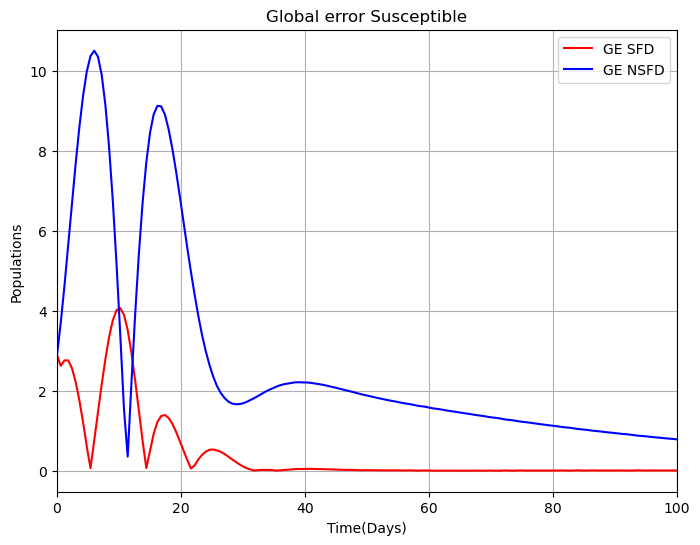

In [19]:
plt.figure(figsize = (8, 6))
plt.plot(t[0:Nt],GEsfd[:,0], label='D', color='r')
plt.plot(t[0:Nt], GEnsfd0, label='D', color='b')
plt.legend(["GE SFD","GE NSFD"])
plt.title("Global error Susceptible")
plt.xlim([0,100])
#plt.ylim([0,10])
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.grid(True)
plt.show()

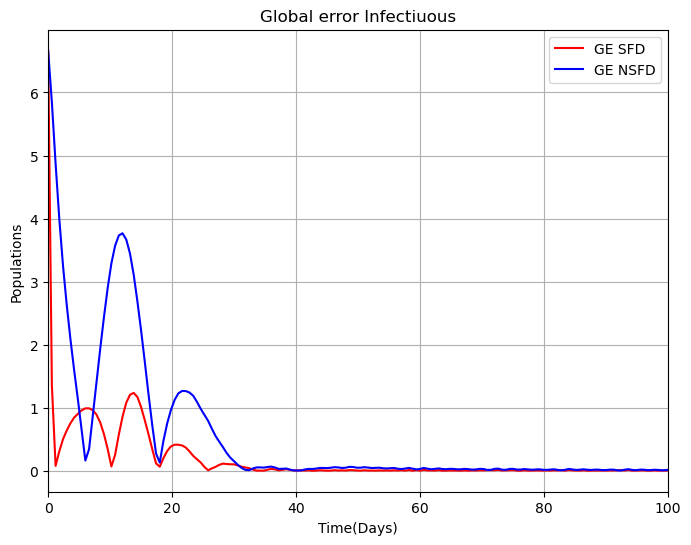

In [20]:
plt.figure(figsize = (8, 6))
plt.plot(t[0:Nt],GEsfd[:,1], label='D', color='r')
plt.plot(t[0:Nt], GEnsfd1, label='D', color='b')
plt.legend(["GE SFD","GE NSFD"])
plt.title("Global error Infectiuous")
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.xlim([0,100])
plt.grid(True)
plt.show()

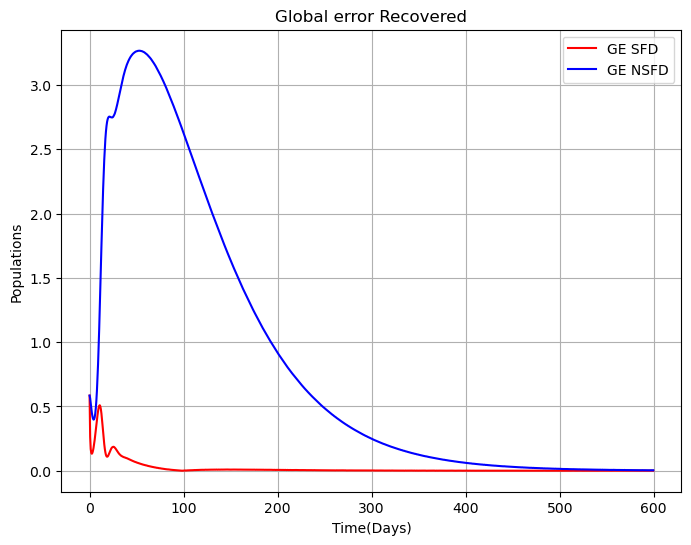

In [21]:
plt.figure(figsize = (8, 6))
plt.plot(t[0:Nt],GEsfd[:,2], label='D', color='r')
plt.plot(t[0:Nt], GEnsfd2, label='D', color='b')
plt.legend(["GE SFD","GE NSFD"])
plt.title("Global error Recovered")
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
#plt.xlim([0,100])
plt.grid(True)
plt.show()

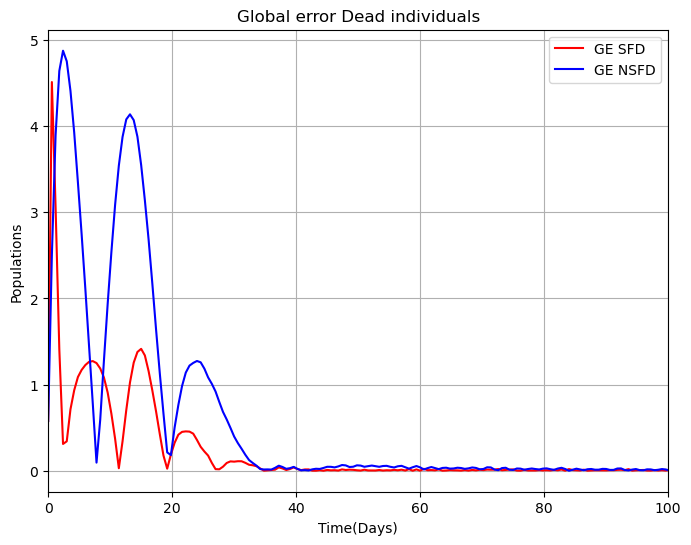

In [22]:
plt.figure(figsize = (8, 6))
plt.plot(t[0:Nt],GEsfd[:,3], label='D', color='r')
plt.plot(t[0:Nt], GEnsfd3, label='D', color='b')
plt.legend(["GE SFD","GE NSFD"])
plt.title("Global error Dead individuals")
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
plt.xlim([0,100])
plt.grid(True)
plt.show()

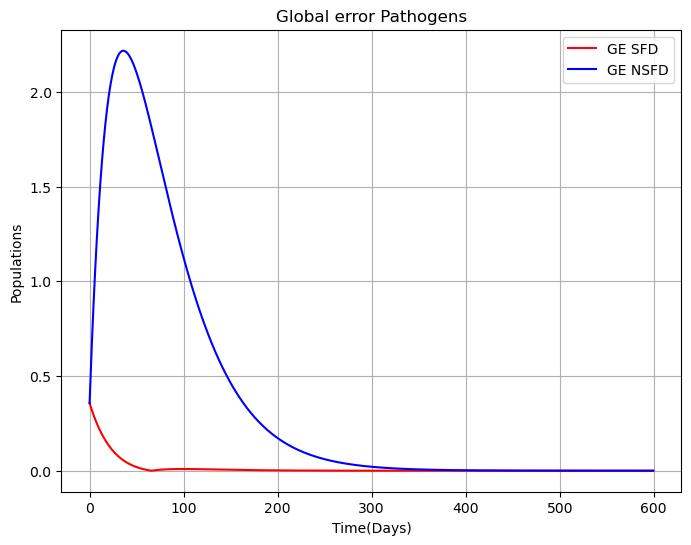

In [23]:
plt.figure(figsize = (8, 6))
plt.plot(t[0:Nt],GEsfd[:,4], label='D', color='r')
plt.plot(t[0:Nt], GEnsfd4, label='D', color='b')
plt.legend(["GE SFD","GE NSFD"])
plt.title("Global error Pathogens")
plt.xlabel('Time(Days)')
plt.ylabel('Populations')
#plt.xlim([0,100])
plt.grid(True)
plt.show()